# SOAL UAS

NIM : 2020230022
    
Nama : Satria Afit Hernando    

### Soal :

- Download dataset iris.csv di salah satu public dataset : keggle, UCI, dsbnya
- Gunakan Dataset : iris.cvs, pilih satu algoritma yang terbaik berdasarkan evaluasi, simpan menggunakan pickle, siapkan app py, deploy dengan streamlit dan upload ke server stremlit

In [9]:
import pandas as pd
from sklearn import datasets

df_klasifikasi=pd.read_csv("iris.csv")
df_klasifikasi

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
#Feature selection
X=df_klasifikasi[['sepal_length','sepal_width','petal_length','petal_width']]

#Target
y=df_klasifikasi['species']
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

## Normalize Data - Scalling

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [12]:
print("10 data pertama: ")
print(X[:10])

10 data pertama: 
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [13]:
print("10 label pertama: ")
print(y[:10])

10 label pertama: 
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: species, dtype: object


# 1. Pembagian Data

## 1.1 Train-Validation Split


Train-Validation split dapat dilakukan dengan menjalankan potongan kode di bawah. Persentase pembagian data training dan data validasi dapat ditentukan dengan mengubah nilai parameter train_size.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [16]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  105
Banyak data uji setelah dilakukan Train-Validation Split:  45


In [17]:
print("Label Training\n",y_train.value_counts())
print("\nLabel Prediksi\n",y_test.value_counts())

Label Training
 Iris-virginica     39
Iris-versicolor    36
Iris-setosa        30
Name: species, dtype: int64

Label Prediksi
 Iris-setosa        20
Iris-versicolor    14
Iris-virginica     11
Name: species, dtype: int64


## 1.2	K-Fold Cross Validation

Pustaka Scikit-learn menyediakan wrapper untuk melakukan K-Fold Cross Validation, yaitu dengan meng-import cross_val_score. cross_val_score menerima input berupa model machine learning, data training, label training, dan nilai K. Output yang dikeluarkan akan berupa list berisi akurasi setiap fold, sehingga untuk mendapatkan nilai rata-rata akurasi dari setiap foldnya, dapat menggunakan built-in function mean().

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

# y_pred = lr.predict(X_test)
# score = metrics.accuracy_score(y_test, y_pred)
# print("Akurasi dengan menggunakan Logistic Regression: ", score)
# from sklearn.metrics import precision_recall_fscore_support
# P=precision_recall_fscore_support(y_test, y_pred, average='macro')
# print("Precison : ",P[0])
# print("Recall : ",P[1])
# print("F Score : ",P[2])

Akurasi model SVM untuk tiap fold:  [0.96666667 1.         0.93333333 0.93333333 1.        ]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9666666666666668


# 2. Metode Klasifikasi

Untuk potongan-potongan kode Metode Klasifikasi, data yang akan digunakan adalah data yang telah terbagi oleh proses Train-Validation split. Model akan dilatih dengan X_train dan y_train. Model yang telah terlatih kemudian diuji performa akurasinya menggunakan X_test dan y_test.

## 2.1 Logistic Regression

Penjelasan lebih lengkap mengenai penggunaan Logistic Regression dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", score)

Akurasi dengan menggunakan Logistic Regression:  0.9333333333333333


Akurasi Testing NBC: 0.9555555555555556
Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556
Precison :  0.9487179487179488
Recall :  0.9523809523809524
F Score :  0.9465811965811964


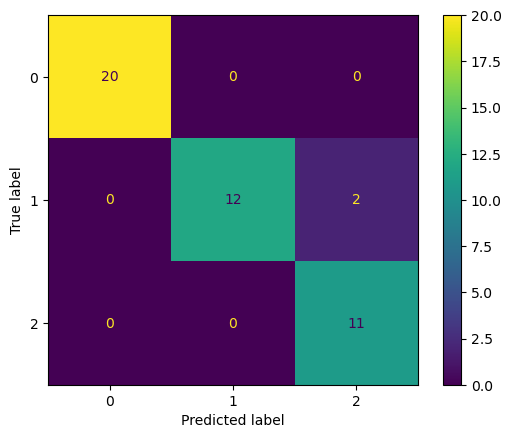

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Assuming y_test and y_pred are your actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
ConfusionMatrixDisplay(cm).plot()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Akurasi Testing NBC:', accuracy)

# Ir.fit(X_train, y_train)
# y_pred = Ir.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", score)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.2 Support Vector Machine

Penjelasan lebih lengkap mengenai penggunaan Support Vector Machine dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [26]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01
)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine: ", score)

Akurasi dengan menggunakan Support Vector Machine:  0.9333333333333333


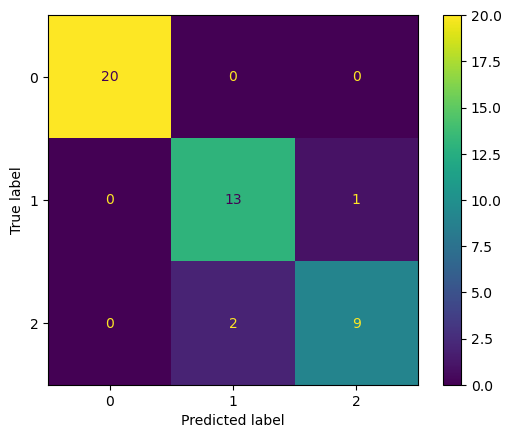

Accuracy Testing SVM: 0.9333333333333333
Precision:  0.9222222222222222
Recall:  0.9155844155844156
F Score:  0.9178981937602627


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming svm is your trained classifier and X_test, y_test are your testing data
y_pred = svm.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Testing SVM:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


### Hyperparameter SVM

Saat menggunakan model SVM, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara lain kernel (linear, polynomial, rbf), nilai C, dan nilai Gamma.

In [28]:
# SVM dengan kernel Linear, nilai parameter C dapat diubah juga.
svmLinear = SVC(
  kernel = 'linear',
      C = 1)

svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  0.9333333333333333


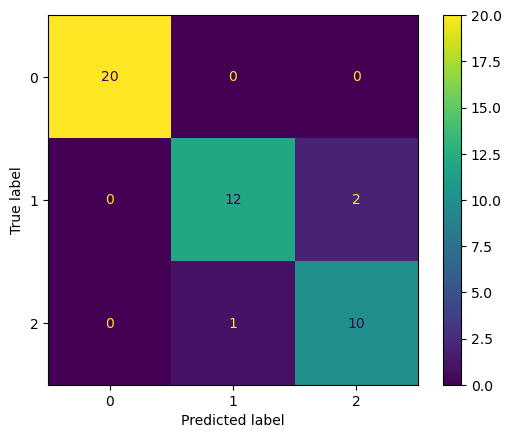

Akurasi dengan menggunakan Support Vector Machine Linear Kernel: 0.9333333333333333
Precision:  0.9188034188034188
Recall:  0.9220779220779222
F Score:  0.9194847020933977


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming svmLinear is your trained classifier and X_test, y_test are your testing data
y_pred = svmLinear.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi dengan menggunakan Support Vector Machine Linear Kernel:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


In [30]:
# SVM dengan kernel polynomial, nilai parameter C, degree, dan gamma dapat diubah juga.
svmPoly = SVC(
  kernel = 'poly',
  C = 1,
  gamma = 0.01,
  degree = 2
)

svmPoly.fit(X_train, y_train)
y_pred = svmPoly.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:  0.24444444444444444


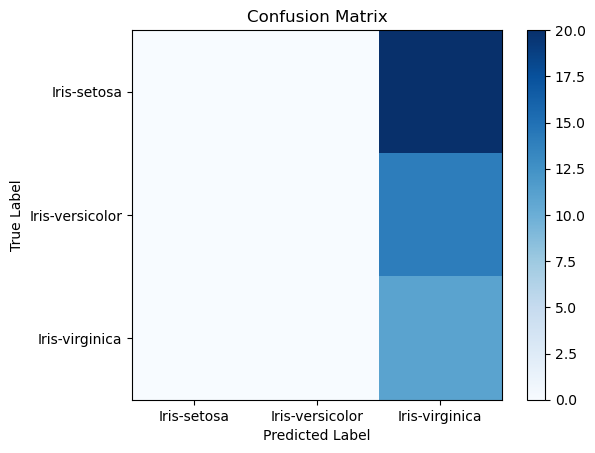

Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: 0.24444444444444444
Precision:  0.08148148148148147
Recall:  0.3333333333333333
F Score:  0.13095238095238096


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return result


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming svmPoly is your trained classifier and X_test, y_test are your testing data
y_pred = svmPoly.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = sorted(set(y_test))
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


In [32]:
# SVM dengan kernel RBF, nilai parameter C dan gamma dapat diubah juga.
svmRBF = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01,
)

svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  0.9333333333333333
Precison :  0.9222222222222222
Recall :  0.9155844155844156
F Score :  0.9178981937602627


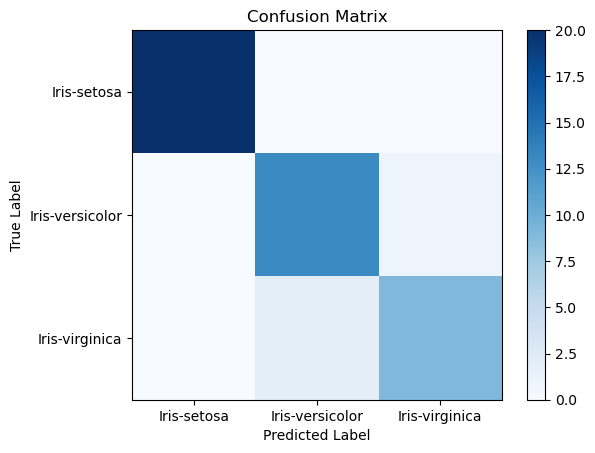

Akurasi dengan menggunakan Support Vector Machine RBF Kernel: 0.9333333333333333
Precision:  0.9222222222222222
Recall:  0.9155844155844156
F Score:  0.9178981937602627


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming svmRBF is your trained classifier and X_test, y_test are your testing data
y_pred = svmRBF.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = sorted(set(y_test))
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi dengan menggunakan Support Vector Machine RBF Kernel:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


## 2.3 Decision Tree

Penjelasan lebih lengkap mengenai penggunaan Decision Tree dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(
  max_depth = None,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  0.9555555555555556


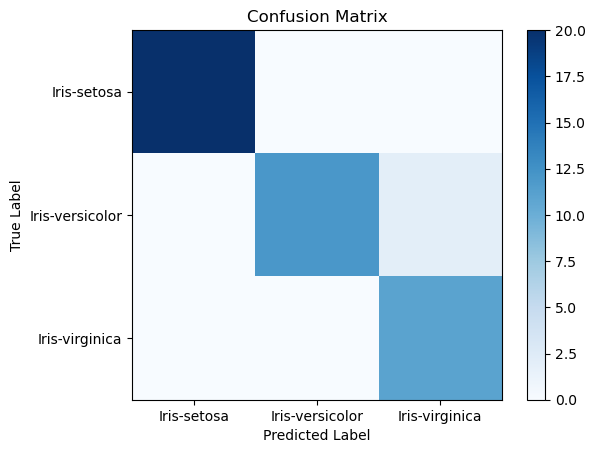

Accuracy Testing Decision Tree: 0.9555555555555556
Precision:  0.9487179487179488
Recall:  0.9523809523809524
F Score:  0.9465811965811964


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming dt is your trained Decision Tree classifier and X_test, y_test are your testing data
y_pred = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = sorted(set(y_test))
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Testing Decision Tree:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


### Hyperparameter Decision Tree

Saat menggunakan model Decision Tree, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara max_depth dan min_samples_split.

In [36]:
# Decision Tree dengan maximal kedalaman adalah max_depth,
# dan minimal jumlah sampel untuk dibentuk leaf baru adalah min_samples_split

dt = DecisionTreeClassifier(
  max_depth = 130,
  min_samples_split = 5
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  0.9555555555555556


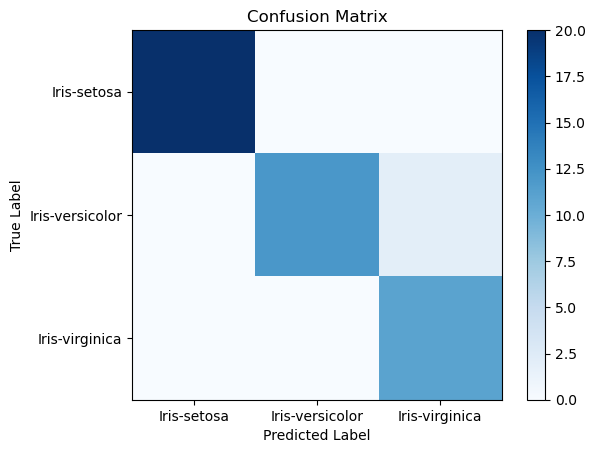

Akurasi dengan menggunakan Decision Tree: 0.9555555555555556
Precision:  0.9487179487179488
Recall:  0.9523809523809524
F Score:  0.9465811965811964


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming dt is your trained Decision Tree classifier and X_test, y_test are your testing data
y_pred = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = sorted(set(y_test))
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi dengan menggunakan Decision Tree:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


## 2.4 Naive Bayes

Penjelasan lebih lengkap mengenai penggunaan Naive Bayes dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [38]:
from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Naive Bayes: ", score)

Akurasi dengan menggunakan Naive Bayes:  0.7555555555555555


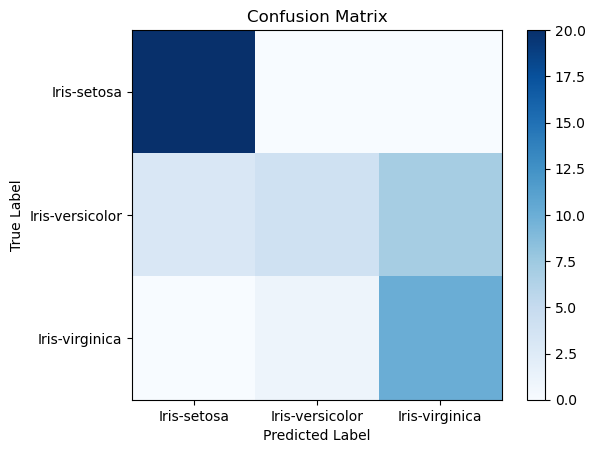

Akurasi dengan menggunakan Naive Bayes: 0.7555555555555555
Precision:  0.7526001705029839
Recall:  0.7316017316017316
F Score:  0.6885236346680655


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming nb is your trained Naive Bayes classifier and X_test, y_test are your testing data
y_pred = nb.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = sorted(set(y_test))
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi dengan menggunakan Naive Bayes:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


## 2.5 K-Nearest Neighbors

Penjelasan lebih lengkap mengenai penggunaan K-Nearest Neighbors dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.9555555555555556


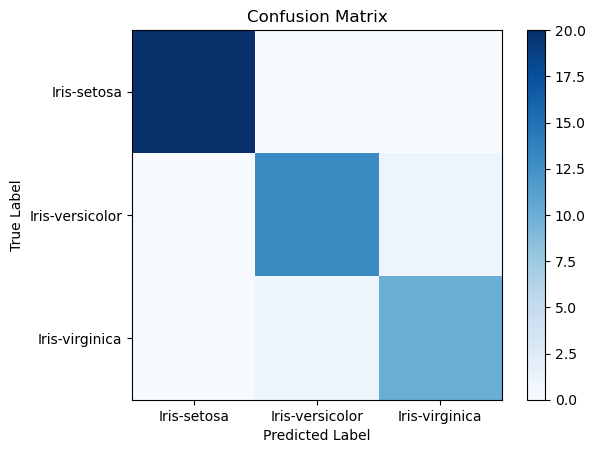

Accuracy Testing K-NN: 0.9555555555555556
Precision:  0.9458874458874459
Recall:  0.9458874458874459
F Score:  0.9458874458874459


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming knn is your trained K-NN classifier and X_test, y_test are your testing data
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = sorted(set(y_test))
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Testing K-NN:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


## 2.6 AdaBoostClassifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [66]:
ab=AdaBoostClassifier(
n_estimators=600,
learning_rate=1
)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan AdaBoostClassifier: ", score)

Akurasi dengan menggunakan AdaBoostClassifier:  0.9555555555555556


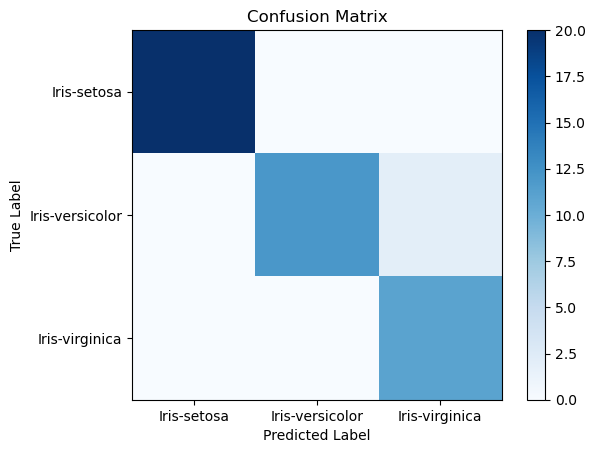

Accuracy Testing AdaBoost: 0.9555555555555556
Precision:  0.9487179487179488
Recall:  0.9523809523809524
F Score:  0.9465811965811964


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming dt is your trained Decision Tree classifier and X_test, y_test are your testing data
y_pred = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = sorted(set(y_test))
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Testing AdaBoost:', accuracy)

# Calculate precision, recall, and F-score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", P[0])
print("Recall: ", P[1])
print("F Score: ", P[2])


## Perbandingan Hasil Klasifikasi Data Pendaftar Untuk Berbagai Metoda Klasifikasi :


In [77]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Assuming you have trained models for each classifier: svm, dt, nb, knn, adaBoost
classifiers = [svm, dt, nb, knn]  # Make sure adaBoost is defined
classifier_names = ['SVM', 'Decision Tree', 'Naive Bayes', 'K-NN']

results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F-Score': []}

for clf, name in zip(classifiers, classifier_names):
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    # Append results to the dictionary
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F-Score'].append(f_score)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


      Classifier  Accuracy  Precision    Recall   F-Score
0            SVM  0.933333   0.922222  0.915584  0.917898
1  Decision Tree  0.955556   0.948718  0.952381  0.946581
2    Naive Bayes  0.755556   0.752600  0.731602  0.688524
3           K-NN  0.955556   0.945887  0.945887  0.945887


---

## Pilih satu satu Algortima yang hasil trainingnya terbaik menurut anda dan Menyimpan model dengan pickle  Gunakan untuk anda Deploy dalam bentuk aplikasi streamlit dan upload ke streamlit

In [88]:
import pickle
from sklearn.naive_bayes import GaussianNB  # Assuming Gaussian Naive Bayes

# Assuming best_classifier is the best-performing Naive Bayes classifier
best_classifier = GaussianNB()  # Replace with your actual best Naive Bayes classifier

# Training the Naive Bayes classifier (replace X_train, y_train with your training data)
# best_classifier.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('iris.pkl', 'wb') as model_file:
    pickle.dump(best_classifier, model_file)



In [89]:
import streamlit as st
import pickle
import numpy as np

# Load the saved model
with open('iris.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Function to make predictions using the loaded model
def predict(input_features):
    # Assuming input_features is a list or array containing the features for prediction
    input_array = np.array(input_features).reshape(1, -1)
    prediction = model.predict(input_array)
    return prediction

# Streamlit app code
st.title('Your Streamlit App with the Best Model')

# Example input fields for features
feature1 = st.slider('Feature 1', 0.0, 1.0, 0.5)
feature2 = st.slider('Feature 2', 0.0, 1.0, 0.5)

# Button to trigger prediction
if st.button('Make Prediction'):
    input_features = [feature1, feature2]  # Add more features as needed
    prediction = predict(input_features)
    st.write('Prediction:', prediction)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  if pickle_version != __version__:
2024-01-18 10:08:32.645 
  command:

    streamlit run C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
